### CNN_DataAugmentation_CatDogs_Kaggle

FileName = CNN_DataAugmentation_CatDogs_Kaggle.ipynb

+ Code here plays with the Cats & Dogs data set from Kaggle.



In [1]:

import os
import time 
import numpy as np
import matplotlib.pyplot as plt

import shutil, pathlib

import tensorflow as tf
import keras 
from keras import layers 

# the 3 lines below are requied to clean the image data when using the FullSet
import glob
import os
from pathlib import Path
from tensorflow.io import read_file
from tensorflow.image import decode_image

from keras.utils import image_dataset_from_directory

print( os.getcwd() )

2025-02-14 19:37:30.077580: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739579850.089837   20536 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739579850.093213   20536 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 19:37:30.107247: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/drv3/hm3/code/python/tf2.18/tf2.18/local


In [2]:
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)


In [3]:
"""  Data Cleaning 

keras model.fit( ) reported errors when the input comes from the FullSet.
The error is

  Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
    . . . 
   and eventually the execution stops.

I found that the error happened on files when the image file is larger than 50KB   

Several people reported the same isue. A fix from https://github.com/tensorflow/datasets/issues/2188 is below
  
from pathlib import Path
from tensorflow.io import read_file
from tensorflow.image import decode_image

# data_dir is of type Path and points to the parent dir
# parent dir contains the directories 'Dog' and 'Cat'
# run the same code for the dir 'Cat' to remove corrupt files 
for image in sorted((data_dir/'Dog').glob('*')):
    try:
        img = read_file(str(image))
        img = decode_image(img)
        
        if img.ndim != 3:
            print(f"[FILE_CORRUPT] {str(image).split('/')[-1]} DELETED")
            image.unlink()
            
    except Exception as e:
        print(f"[ERR] {str(image).split('/')[-1]}: {e} DELETED")
        image.unlink()
 """

# data_dir is the directory where the code in this function will be applied 

# contains 2488 files prior to cleaning
temp = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/*.jpg"

def cleanFullSetData( dataDir):
    for image in sorted(glob.glob(dataDir)):
            print(image) 
            img = read_file(str(image))
            img = decode_image(img)
            if img.shape[2] != 3:
                print(image)
                os.remove(image)

## I am saving a copy of the test{cats, dogs} and tran{cats, dogs} bedore cleaning, in
## /drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train (Copy)  9977 files
## and
## /drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test (Copy)  9974 files
## and
## /drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation (Copy)  4939 files



# contains 2488 files prior to cleaning
d1 = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/*.jpg"
cleanFullSetData(d1) 

# contains 2467 files prior to cleaning
d2 = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/*.jpg"
cleanFullSetData(d2) 

# contains 4984 files prior to cleaning
d3 = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/*.jpg"
cleanFullSetData(d3) 

# contains 4988 files prior to cleaning
d4 = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/*.jpg"
cleanFullSetData(d4) 

# contains 4989 files prior to cleaning
d5 = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/*.jpg"
cleanFullSetData(d5) 

# contains 4986 files prior to cleaning
d6 = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/*.jpg"
cleanFullSetData(d6) 



/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10006.jpg


I0000 00:00:1739579852.200130   20536 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9566 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:08:00.0, compute capability: 8.6


/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10007.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10008.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10009.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10010.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10011.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10012.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10013.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10014.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10015.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10016.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10017.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10018.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10019.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/10

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12317.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12318.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12319.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12320.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12321.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12322.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12323.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12324.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12325.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12326.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12327.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12328.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12329.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/cat/12

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12115.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12116.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12117.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12118.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12119.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12120.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12121.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12122.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12123.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12124.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12125.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12126.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12127.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/validation/dog/12

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3156.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3157.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3158.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3159.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/316.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3160.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3161.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3162.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3163.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3164.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3165.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3166.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3167.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3168.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3169.jpg
/drv3/hm3/Data/ImgData/Cat

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4301.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4302.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4303.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4304.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4305.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4306.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4307.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4308.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4309.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/431.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4310.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4311.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4312.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4313.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4314.jpg
/drv3/hm3/Data/ImgData/Cat

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3268.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/327.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3270.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3271.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3272.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3273.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3274.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3275.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3276.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3277.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3278.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3279.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/328.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3280.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/3281.jpg
/drv3/hm3/Data/ImgData/Cats

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/452.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4520.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4521.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4522.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4523.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4524.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4525.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4526.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4527.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4528.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4529.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/453.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4530.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4531.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/dog/4532.jpg
/drv3/hm3/Data/ImgData/Cats

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1455.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1456.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1457.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1458.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1459.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/146.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1460.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1461.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1462.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1463.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1464.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1465.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1466.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1467.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1468.jpg
/drv3/hm3/D

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1637.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1638.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1639.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/164.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1640.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1641.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1642.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1643.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1644.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1645.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1646.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1647.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1648.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/1649.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat/165.jpg
/drv3/hm3/Da

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6033.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6034.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6035.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6036.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6037.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6038.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6039.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6040.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6041.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6042.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6043.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6044.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6045.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6046.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/6047.jpg
/drv3/hm3/

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7040.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7041.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7042.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7043.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7044.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7045.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7046.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7047.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7048.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7049.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7050.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7051.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7052.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7053.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7054.jpg
/drv3/hm3/

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7719.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7720.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7721.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7722.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7723.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7724.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7725.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7726.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7727.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7728.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7729.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7730.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7731.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7732.jpg
/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/dog/7733.jpg
/drv3/hm3/

### CUDA ERROR

+ DATE: 2025_0207

+ ERROR ```failed to allocate 24.44MiB (25624576 bytes) from device: RESOURCE_EXHAUSTED: : CUDA_ERROR_OUT_OF_MEMORY: out of memory ``` 

+ Looks like the GPUs are getting overloaded. 

#### Possible solutions


1. Reduce the batch size from 32 to (24, 16, 8, 4, 2) and see if that fixes the error

2. Gradient Accumulation

      + If reducing the batch size affects training negatively, consider gradient accumulation.  This technique simulates a larger batch size by accumulating gradients over multiple smaller batches before updating the model/drv3/hm3/code/python/tf2.18/CNN_DataAugmentation_CatsDogs_Kaggle.ipynb
```


In [4]:

# Get the data directories and paths ready for processing

#base_dat_dir = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/"
#input_dir  = base_dat_dir + "images/"
#target_dir = base_dat_dir +  "annotations/trimaps/"

#codeDir = "/drv3/hm3/code/python/tf/keras/Playground/"
#origTrDir = "/drv3/hm3/Data/imgData/Kaggle_CatsDogs/"
#original_dir = pathlib.Path("/drv3/hm3/Data/ImgData/Kaggle_CatsDogs/")
#new_base_dir = pathlib.Path("/drv3/hm3/Data/ImgData/Kaggle_CatsDogs/small_set/")

codeDir = "/drv3/hm3/code/python/tf2.18/tf2.18/local/Playground/"
# dataDir = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/SmallSet/"
dataDir = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/"

train_dataset = pathlib.Path( dataDir + "train/")
test_dataset = pathlib.Path( dataDir + "test/")
validation_dataset  = pathlib.Path( dataDir + "validation/")

# define the directories where the training, test, and validation images are located
# for processing

# use img_size of (200,200) or (180,180)
img_size = (180, 180)

# use same nEpochs for training and for loading the model afterwads for comparison
nEpochs = 75
locBatchSize = 32

train_dataset = image_dataset_from_directory(
    train_dataset,
    image_size=img_size,
    batch_size=locBatchSize)
    
test_dataset = image_dataset_from_directory(
    test_dataset,
    image_size=img_size,
    batch_size=locBatchSize)

validation_dataset =image_dataset_from_directory(
    validation_dataset,
    image_size=img_size,
    batch_size=locBatchSize)

Found 9975 files belonging to 2 classes.
Found 9972 files belonging to 2 classes.
Found 4937 files belonging to 2 classes.


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [5]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

2025-02-14 19:38:19.629407: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


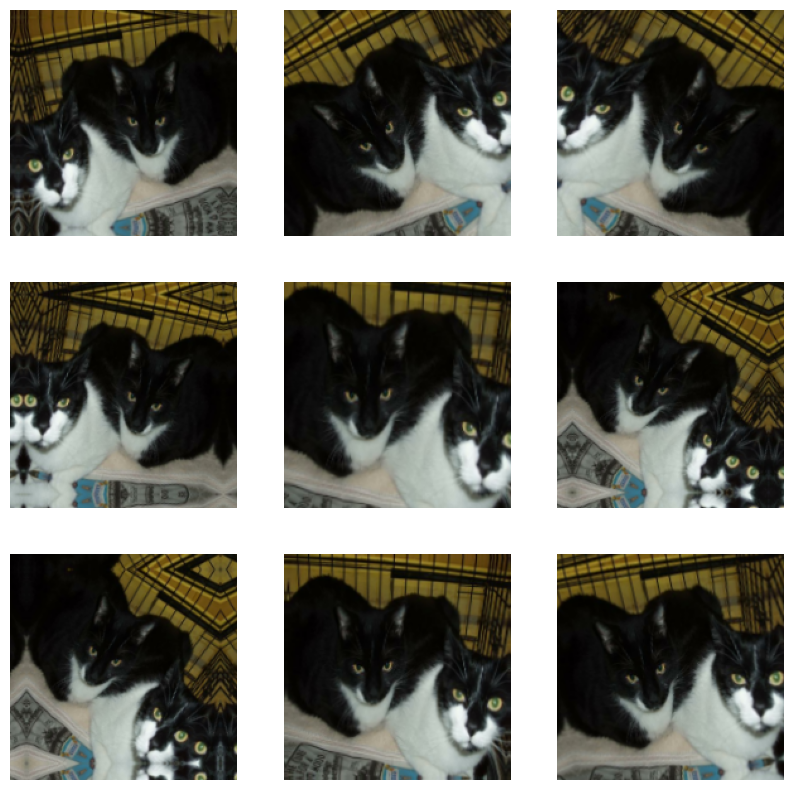

In [6]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [7]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [8]:

callback_dir = codeDir + "CNN_DataAugmentation_CatsDogs_KaggleSmallSet.keras"
callbacks = [ keras.callbacks.ModelCheckpoint( filepath= callback_dir, save_best_only=True, monitor="val_loss") ]

print( callback_dir )
callbacks = [ keras.callbacks.ModelCheckpoint( filepath= callback_dir, save_best_only=True, monitor="val_loss") ]


""" model.fit reports an error when the inmput comes from the FullSet. The error is
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9

A fix suggested at https://github.com/tensorflow/datasets/issues/2188
 was to remove the files below. Unfortunately that did not work

'PetImages\\Dog\\10880.jpg',    # done
'PetImages\\Dog\\164.jpg',      # done
'PetImages\\Dog\\11124.jpg',    # done
'PetImages\\Dog\\621.jpg',      # done
'PetImages\\Dog\\6754.jpg',     # done
'PetImages\\Dog\\3176.jpg',     # done
'PetImages\\Dog\\4956.jpg'      # done
'PetImages\\Cat\\497.jpg',      # done
'PetImages\\Cat\\8051.jpg',     # done
'PetImages\\Cat\\9813.jpg',     # done
'PetImages\\Cat\\10838.jpg',    # done
'PetImages\\Cat\\11279.jpg',    # done

Another fix that appears to be beter is this code:

from pathlib import Path
from tensorflow.io import read_file
from tensorflow.image import decode_image

# data_dir is of type Path and points to the parent dir
# parent dir contains the directories 'Dog' and 'Cat'
# run the same code for the dir 'Cat' to remove corrupt files 
for image in sorted((data_dir/'Dog').glob('*')):
    try:
        img = read_file(str(image))
        img = decode_image(img)
        
        if img.ndim != 3:
            print(f"[FILE_CORRUPT] {str(image).split('/')[-1]} DELETED")
            image.unlink()
            
    except Exception as e:
        print(f"[ERR] {str(image).split('/')[-1]}: {e} DELETED")
        image.unlink()

"""
history = model.fit(
    train_dataset, verbose=0,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)


/drv3/hm3/code/python/tf2.18/tf2.18/local/Playground/CNN_DataAugmentation_CatsDogs_KaggleSmallSet.keras


I0000 00:00:1739579901.202616   20649 cuda_dnn.cc:529] Loaded cuDNN version 90501
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous 

**Evaluating the model on the test set**

In [9]:
test_model = keras.models.load_model( callback_dir )
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

 88/312 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.9102 - loss: 0.2413

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


102/312 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.9095 - loss: 0.2411

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


171/312 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.9076 - loss: 0.2406

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


192/312 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9073 - loss: 0.2402

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


213/312 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9070 - loss: 0.2397

312/312 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.9065 - loss: 0.2367
Test accuracy: 0.906


**Plotting the results**

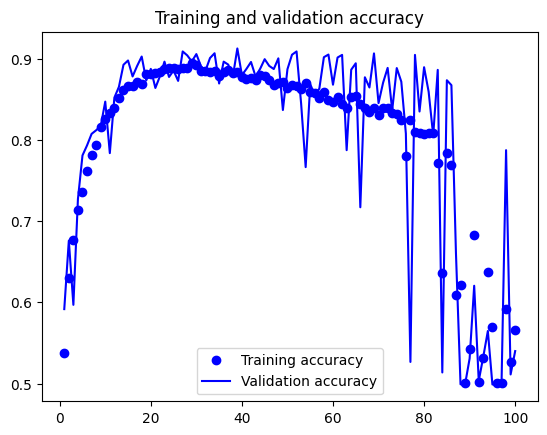

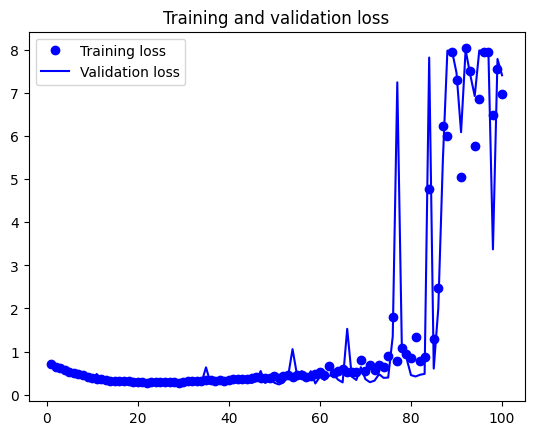

In [10]:

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()